In [77]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [76]:
# Tensor Datasets Building
class DiabetesDataset(Dataset):

    def __init__(self, filepath):
        self.data_original = np.loadtxt(filepath, skiprows=1, delimiter=',')
        self.len = self.data_original[0]
        self.x_data = torch.Tensor(self.data_original[:, :-1])
        self.y_data = torch.Tensor(self.data_original[:, [-1]])
        self.x_train = None
        self.y_train = None
        self.x_valid = None
        self.y_valid = None
        self.x_test = None
        self.y_test = None

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len
    
    def data_split(self, train_size, valid_size, test_size):
        train, valid, test = random_split(self.data_original, [train_size, valid_size, test_size])
        self.x_train, self.y_train = torch.Tensor(train[:, :-1]), torch.Tensor(train[:, [-1]])
        self.x_valid, self.y_valid = torch.Tensor(valid[:, :-1]), torch.Tensor(valid[:, [-1]])
        self.x_test, self.y_test = torch.Tensor(test[:, :-1]), torch.Tensor(test[:, [-1]])
        return 


file = 'pima_indians_diabetes.csv'
mydataset = DiabetesDataset(file)
# mydataset.data_split(train_size=0.8, valid_size=0.1, test_size=0.1)
# mydataset.x_train.shape
# trainloader = DataLoader(dataset=TensorDataset(mydataset.x_train,mydataset.y_train), batch_size=32, shuffle=True)

In [71]:
class MyModel(nn.Module):
    def __init__(self, dim1, dim2):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(8, dim1, bias=False)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(dim1, dim2)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(dim2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        output = self.linear1(x)
        output = self.activation1(output)
        output = self.linear2(output)
        output = self.activation2(output)
        output = self.linear3(output)
        output = self.sigmoid(output)
        return output
    
model = MyModel(64, 8)

In [81]:
#Creating the Model
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20, hidden2=10,out_features=1):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

model = ANN_model()

In [82]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [83]:
epochs=500
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred=model.forward(mydataset.x_data)
    loss=loss_fn(y_pred,mydataset.y_data)
    final_losses.append(loss)
    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : -0.0
Epoch number: 11 and the loss : -0.0
Epoch number: 21 and the loss : -0.0
Epoch number: 31 and the loss : -0.0
Epoch number: 41 and the loss : -0.0
Epoch number: 51 and the loss : -0.0
Epoch number: 61 and the loss : -0.0
Epoch number: 71 and the loss : -0.0
Epoch number: 81 and the loss : -0.0
Epoch number: 91 and the loss : -0.0
Epoch number: 101 and the loss : -0.0
Epoch number: 111 and the loss : -0.0
Epoch number: 121 and the loss : -0.0
Epoch number: 131 and the loss : -0.0
Epoch number: 141 and the loss : -0.0
Epoch number: 151 and the loss : -0.0
Epoch number: 161 and the loss : -0.0
Epoch number: 171 and the loss : -0.0
Epoch number: 181 and the loss : -0.0
Epoch number: 191 and the loss : -0.0
Epoch number: 201 and the loss : -0.0
Epoch number: 211 and the loss : -0.0
Epoch number: 221 and the loss : -0.0
Epoch number: 231 and the loss : -0.0
Epoch number: 241 and the loss : -0.0
Epoch number: 251 and the loss : -0.0
Epoch number: 261 and t

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

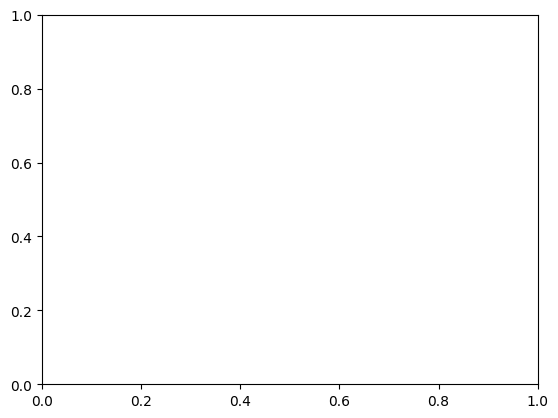

In [84]:
#plot the loss function
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.ylabel('Epochs')

In [73]:
Epochs = 500    
final_loss = []
for epoch in range(Epochs):
    for a, (x,y) in enumerate(trainloader):
        pred = model(x)
        loss = loss_fn(pred, y)
        final_loss.append(loss)
        if a%10 == 1:
            print("Epoch number: {} and the loss : {}".format(a,loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

RuntimeError: Expected floating point type for target with class probabilities, got Long

In [63]:
final_loss = [i.detach().numpy() for i in final_loss]

In [65]:
final_loss

[array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=float32),
 array(-0., dtype=fl

ValueError: x and y must have same first dimension, but have shapes (500,) and (12000,)

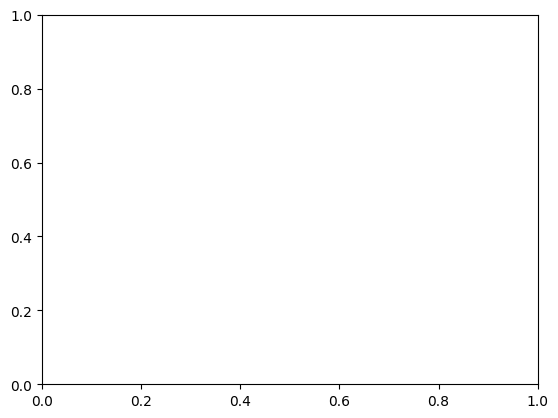

In [64]:
plt.plot(range(Epochs),final_loss)
plt.ylabel('Loss')
plt.ylabel('Epochs')

In [145]:
# Tensor Datasets
df_tensor = torch.Tensor(df.values)
x_tensor = torch.Tensor(x.values)
y_tensor = torch.Tensor(y.values)
x_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)
x_test_tensor = torch.Tensor(x_test.values)
y_test_tensor = torch.Tensor(y_test.values)
# df_tensor = torch.Tensor(torch.from_numpy(df.to_numpy()))
# x_tensor = torch.DoubleTensor(torch.from_numpy(x.to_numpy()))
# y_tensor = torch.LongTensor(torch.from_numpy(y.to_numpy()))
# x_train_tensor = torch.DoubleTensor(torch.from_numpy(x_train.to_numpy()))
# y_train_tensor = torch.LongTensor(torch.from_numpy(y_train.to_numpy()))
# x_test_tensor = torch.DoubleTensor(torch.from_numpy(x_test.to_numpy()))
# y_test_tensor = torch.LongTensor(torch.from_numpy(y_test.to_numpy()))

In [134]:
trainloader = DataLoader(TensorDataset(x_train_tensor, y_train_tensor), batch_size=1, shuffle=True)

In [135]:
class MyModel(nn.Module):
    def __init__(self, dim1, dim2):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(8, dim1, bias=False)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(dim1, dim2)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(dim2, 1)
    
    def forward(self, x):
        output = self.linear1(x)
        output = self.activation1(output)
        output = self.linear2(output)
        output = self.activation2(output)
        output = self.linear3(output)
        return output
    
model = MyModel(64, 8)

In [136]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for a, (x,y) in enumerate(trainloader):
    pred = model(x)
    # print(pred)
    loss = loss_fn(pred, y)
    if a%10 == 0:
        print(loss)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBack

In [138]:
import numpy as np
pred = model(x_test_tensor)
sigmoid = nn.Sigmoid(pred)
pred = sigmoid(pred)
result = np.argmax()

TypeError: Sigmoid.__init__() takes 1 positional argument but 2 were given

In [139]:
pred

tensor([[-0.2824],
        [-0.3201],
        [-0.3150],
        [-0.3372],
        [-0.3173],
        [-0.2499],
        [-0.3576],
        [-0.3104],
        [-0.2772],
        [-0.2491],
        [-0.3099],
        [-0.2342],
        [-0.2888],
        [-0.2978],
        [-0.3267],
        [-0.2924],
        [-0.3020],
        [-0.3297],
        [-0.2868],
        [-0.2922],
        [-0.2916],
        [-0.3344],
        [-0.2162],
        [-0.3118],
        [-0.3196],
        [-0.2784],
        [-0.3070],
        [-0.3596],
        [-0.2728],
        [-0.3313],
        [-0.2837],
        [-0.2274],
        [-0.2405],
        [-0.3204],
        [-0.2642],
        [-0.2759],
        [-0.1793],
        [-0.3172],
        [-0.2917],
        [-0.2969],
        [-0.3277],
        [-0.2445],
        [-0.2282],
        [-0.3312],
        [-0.3571],
        [-0.2588],
        [-0.3133],
        [-0.2841],
        [-0.2706],
        [-0.3021],
        [-0.3428],
        [-0.3001],
        [-0.

In [109]:
test_y = torch.LongTensor(y_train.values)
test_y

tensor([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],

In [76]:
type(y_tensor[0][0])

torch.Tensor

In [142]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset from github
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

file_url = 'https://raw.githubusercontent.com/xinxiewu/datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(download_file(file_url))

# Diabetes Group
df.loc[(df['diabetes'] == 1) & (df['glucose'] == 0), 'glucose'] = 140
df.loc[(df['diabetes'] == 1) & (df['bp'] == 0), 'bp'] = 74
df.loc[(df['diabetes'] == 1) & (df['skin_thick'] == 0), 'skin_thick'] = 27
df.loc[(df['diabetes'] == 1) & (df['insulin'] == 0), 'insulin'] = 100
df.loc[(df['diabetes'] == 1) & (df['bmi'] == 0), 'bmi'] = 34.25
df.loc[(df['diabetes'] == 1) & (df['pedigree'] == 0), 'pedigree'] = 0.449
# Non-Diabetes Group
df.loc[(df['diabetes'] == 0) & (df['glucose'] == 0), 'glucose'] = 107
df.loc[(df['diabetes'] == 0) & (df['bp'] == 0), 'bp'] = 70
df.loc[(df['diabetes'] == 0) & (df['skin_thick'] == 0), 'skin_thick'] = 21
df.loc[(df['diabetes'] == 0) & (df['insulin'] == 0), 'insulin'] = 68.792
df.loc[(df['diabetes'] == 0) & (df['bmi'] == 0), 'bmi'] = 30.05
df.loc[(df['diabetes'] == 0) & (df['pedigree'] == 0), 'pedigree'] = 0.336

# Normalization
df.preg = (df.preg - df.preg.mean())/df.preg.std()
df.glucose = (df.glucose - df.glucose.mean())/df.glucose.std()
df.bp = (df.bp - df.bp.mean())/df.bp.std()
df.skin_thick = (df.skin_thick - df.skin_thick.mean())/df.skin_thick.std()
df.insulin = (df.insulin - df.insulin.mean())/df.insulin.std()
df.bmi = (df.bmi - df.bmi.mean())/df.bmi.std()
df.pedigree = (df.pedigree - df.pedigree.mean())/df.pedigree.std()
df.age = (df.age - df.age.mean())/df.age.std()

# 7:3 Data Split
x = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)